In [1]:
#Habilitar intellisense
%config IPCompleter.greedy=True

In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import make_pipeline

from processing_text import get_clean_text 

In [3]:
movies_ds = pd.read_csv(os.path.join("imdb_dataset.csv"),encoding = "ISO-8859-1")

In [4]:
X_train, X_test, y_train, y_test = train_test_split(movies_ds['Review'], movies_ds['Label'], test_size=0.3, random_state=42)

y_train = (y_train.replace({'pos': 1, 'neg': 0})).values
y_test  = (y_test.replace({'pos': 1, 'neg': 0})).values



In [5]:
def normalize_corpus(documents):
    return np.array([get_clean_text(document) for document in documents])

normalized_corpus_train = normalize_corpus(X_train)
normalized_corpus_test = normalize_corpus(X_test)



In [6]:
cv = CountVectorizer(binary=True)
cv.fit(normalized_corpus_train)
X = cv.transform(normalized_corpus_train)
X_test = cv.transform(normalized_corpus_test)

clasificador_reg_log = LogisticRegression(solver='lbfgs', max_iter=10000)


pipeline = make_pipeline(cv, clasificador_reg_log)
pipeline.fit(normalized_corpus_train,y_train)



Pipeline(memory=None,
         steps=[('countvectorizer',
                 CountVectorizer(analyzer='word', binary=True,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('logisticregression',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=10000,
                                    multi_class='warn', n_jobs=None,

In [7]:
ruta_archivo_clasificador = os.path.join("logistic_regression.pkl")
archivo_clasificador = open(ruta_archivo_clasificador, "wb")
pickle.dump(pipeline, archivo_clasificador)
archivo_clasificador.close()


In [8]:
# accuracy

logistic_regression_accuracy = accuracy_score(y_test, pipeline.predict(normalized_corpus_test))
print('Exactitud del clasificador regresion logistica - version 1 : {0:.2f}'.format(logistic_regression_accuracy))


Exactitud del clasificador regresion logistica - version 1 : 0.89


In [9]:
tree_v3 = RandomForestClassifier(n_estimators=100)
pipeline3 = make_pipeline(cv, tree_v3)

pipeline3.fit(normalized_corpus_train,y_train)

random_forest_accuracy = accuracy_score(y_test, pipeline3.predict(normalized_corpus_test))
print('Exactitud del clasificador de random forest- version 1 : {0:.2f}'.format(random_forest_accuracy))



Exactitud del clasificador de random forest- version 1 : 0.86


In [10]:
tree_v2 = DecisionTreeClassifier(criterion="entropy", max_depth=50)
pipeline2 = make_pipeline(cv, tree_v2)

pipeline2.fit(normalized_corpus_train,y_train) 
decision_tree_accuracy = accuracy_score(y_test, pipeline2.predict(normalized_corpus_test))

print('Exactitud del clasificador de arbol de decision- version 1 : {0:.2f}'.format(decision_tree_accuracy))

Exactitud del clasificador de arbol de decision- version 1 : 0.72


In [11]:
from xgboost.sklearn import XGBClassifier
tree_v4 = XGBClassifier(n_estimators=400,max_depth=6)

pipeline4 = make_pipeline(cv, tree_v4)
pipeline4.fit(normalized_corpus_train,y_train)

xgb_accuracy = accuracy_score(y_test, pipeline4.predict(normalized_corpus_test))
print('Exactitud del clasificador XGB - version 1 : {0:.2f}'.format(xgb_accuracy))

Exactitud del clasificador XGB - version 1 : 0.87


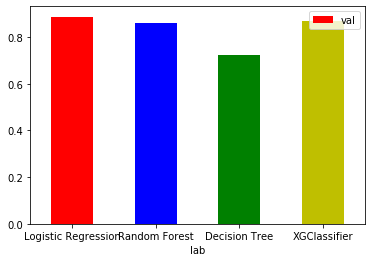

In [12]:
df = pd.DataFrame({'lab':['Logistic Regression', 'Random Forest', 'Decision Tree', 'XGClassifier'], 'val':[logistic_regression_accuracy, random_forest_accuracy, decision_tree_accuracy, xgb_accuracy]})
df.plot.bar(x='lab', y='val', rot=0, color=['r','b','g','y'])


